# Statistical Treatment for NYC Property Sales Dataset

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math
import statistics
import scipy.stats
import statsmodels.api as sm


%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')

## Reading the Dataset

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
df.shape

(84548, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

## Data Cleaning

In [6]:
#Dropping columns
df.drop(['Unnamed: 0','EASE-MENT'], axis=1, inplace=True)

In [7]:
# Replacing numeric values with BOROUGH names
df['BOROUGH'] = df.BOROUGH.replace({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})

In [8]:
# Creating year and month columns from date
df['SALE YEAR'] = pd.DatetimeIndex(df['SALE DATE']).year
df['SALE MONTH'] = pd.DatetimeIndex(df['SALE DATE']).month_name()

In [9]:
# Specifying the Type of Variables
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')


df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['BOROUGH'] = df['BOROUGH'].astype('category')


In [10]:
# Checking for duplicated entries
sum(df.duplicated(df.columns))

765

In [11]:
# Delete the duplicates 
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

## Data Inspection & Visualization

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         83783 non-null  category      
 1   NEIGHBORHOOD                    83783 non-null  object        
 2   BUILDING CLASS CATEGORY         83783 non-null  object        
 3   TAX CLASS AT PRESENT            83783 non-null  category      
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83783 non-null  object        
 7   ADDRESS                         83783 non-null  object        
 8   APARTMENT NUMBER                83783 non-null  object        
 9   ZIP CODE                        83783 non-null  int64         
 10  RESIDENTIAL UNITS               83783 non-null  int64         
 11  CO

In [13]:
# checking missing values
df.columns[df.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

In [14]:
# fill the missing values with mean values.
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean())
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean())

In [15]:
# Manage null values in sale price column
data = df[df['SALE PRICE'].notnull()]

In [16]:
print(data.shape)
data.head(10)

(69607, 22)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR,SALE MONTH
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,5,1633.000000,6440.000000,1900,2,C2,6625000.0,2017-07-19,2017,July
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,10,2272.000000,6794.000000,1913,2,C4,3936272.0,2016-09-23,2016,September
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,6,2369.000000,4615.000000,1900,2,C2,8000000.0,2016-11-17,2016,November
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,...,8,1750.000000,4226.000000,1920,2,C4,3192840.0,2016-09-23,2016,September
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,...,24,4489.000000,18523.000000,1920,2,D9,16232000.0,2016-11-07,2016,November
11,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,D1,530-532 EAST 5TH STREET,,10009,...,10,3717.000000,12350.000000,2009,2,D1,10350000.0,2016-10-17,2016,October
12,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",,10009,...,0,3854.481179,3894.415813,1920,2,C6,1.0,2016-09-06,2016,September
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",,10009,...,0,3854.481179,3894.415813,1920,2,C6,499000.0,2017-03-10,2017,March
14,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 3A",,10009,...,0,3854.481179,3894.415813,1920,2,C6,10.0,2017-04-28,2017,April
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3RD STREET, 5A",,10009,...,0,3854.481179,3894.415813,1920,2,C6,529500.0,2017-06-09,2017,June


/var/folders/xy/xy312wfd7rl3ln2c6qntrhdr0000gn/T/ipykernel_33129/3366757266.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

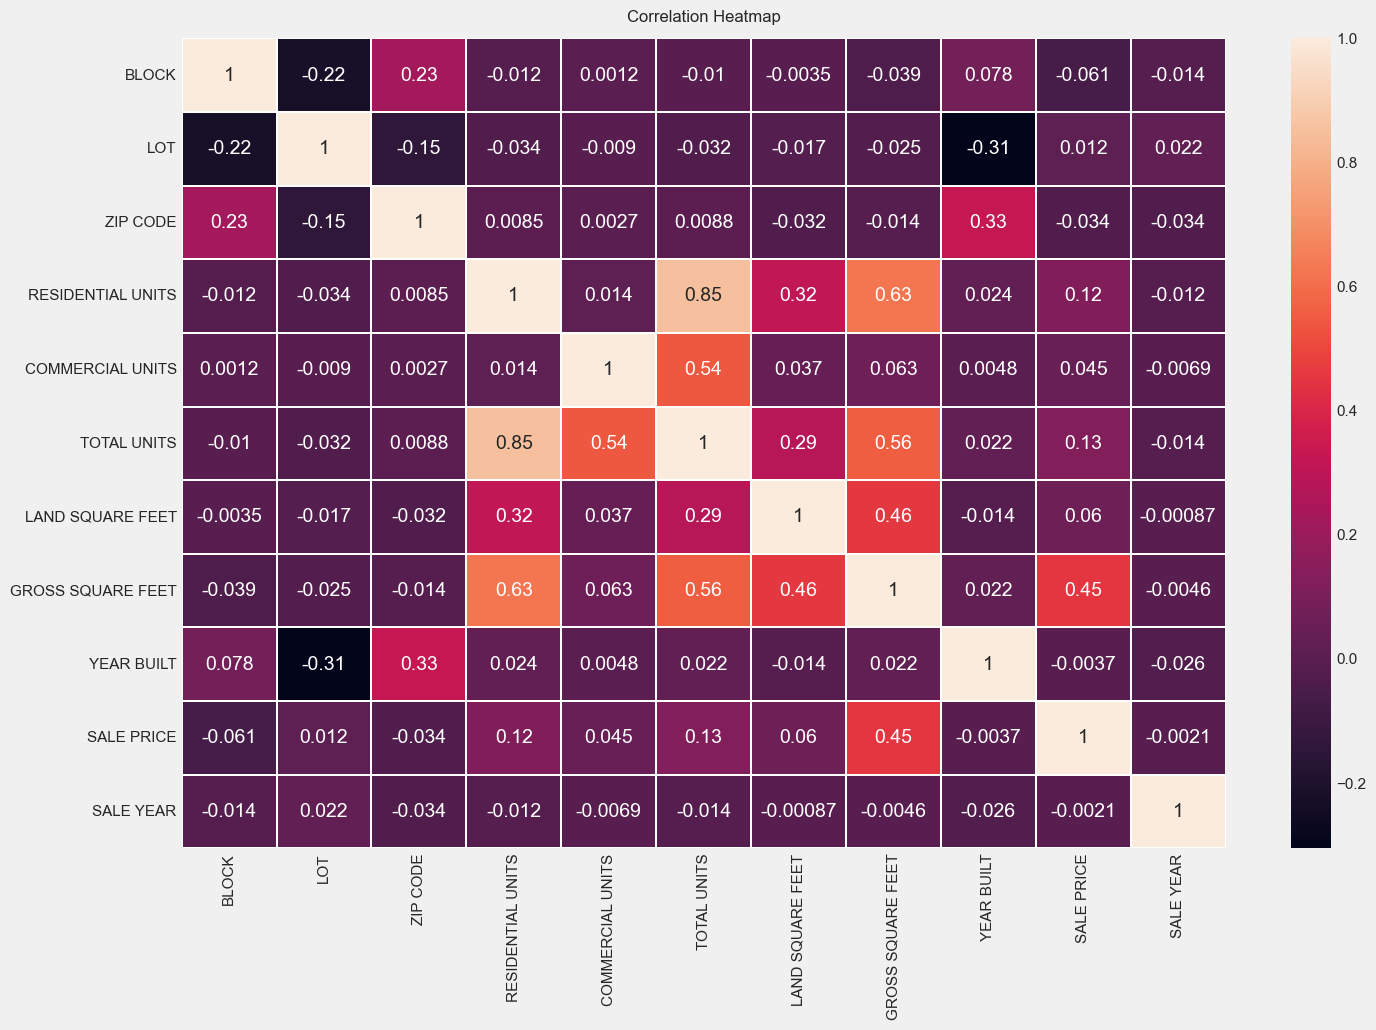

In [17]:
# correlation between the variables
corr = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr, linewidth=0.3, annot=True,)
ax.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [18]:
data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE YEAR
count,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,6.960700e+04,6.960700e+04,69607.000000,6.960700e+04,69607.000000
mean,4199.890140,374.580473,10741.159323,1.875070,0.164121,2.059319,3.638934e+03,3.642753e+03,1799.852184,1.280703e+06,2016.655293
std,3431.897518,656.232024,1264.804508,14.291398,8.997236,16.992716,3.315376e+04,2.422798e+04,520.099311,1.143036e+07,0.475276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2016.000000
25%,1350.000000,22.000000,10306.000000,0.000000,0.000000,0.000000,1.900000e+03,1.266000e+03,1920.000000,2.300000e+05,2016.000000
50%,3378.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.945000e+03,2.400000e+03,1938.000000,5.330000e+05,2017.000000
75%,6192.000000,820.000000,11249.000000,2.000000,0.000000,2.000000,3.854481e+03,3.894416e+03,1965.000000,9.500000e+05,2017.000000
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09,2017.000000



**SALE PRICE**

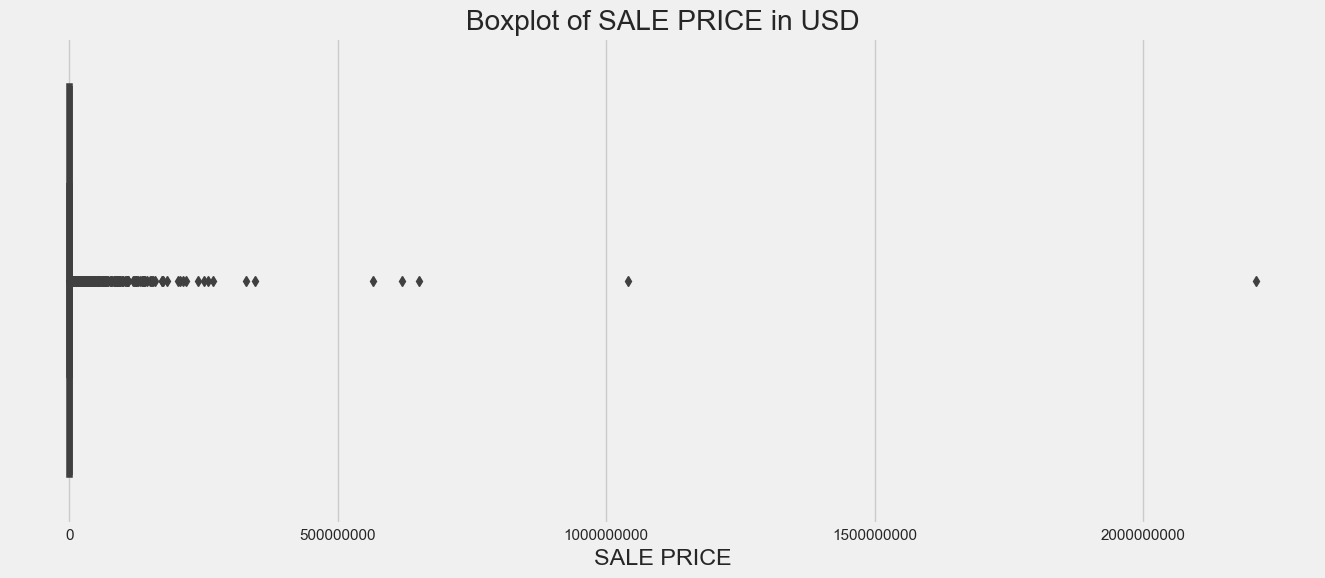

In [19]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

In [20]:
# Remove observations that fall outside those caps
data = data[(data['SALE PRICE'] > 100000) & (data['SALE PRICE'] < 5000000)]

**GROSS SQUARE FEET**

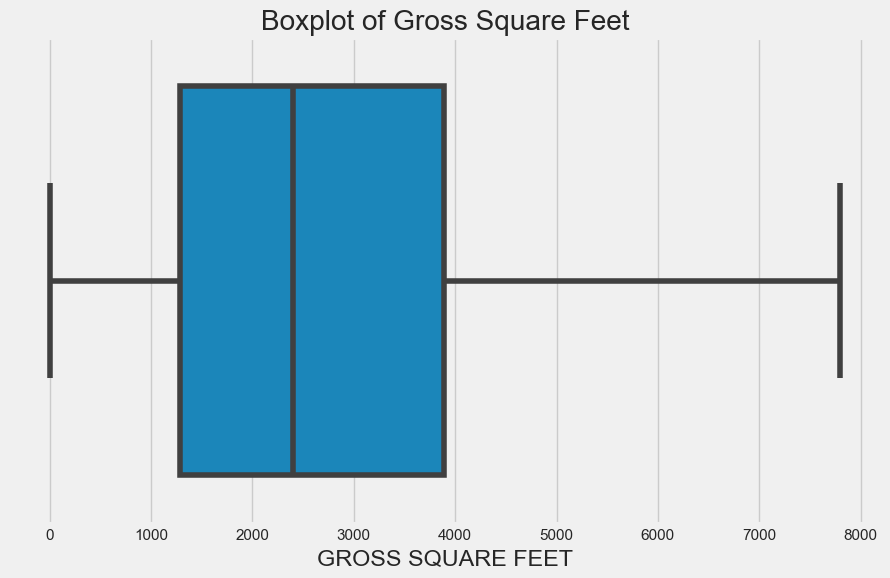

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='GROSS SQUARE FEET', data=data, showfliers=False)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Gross Square Feet')
plt.show()

**LAND SQUARE FEET**

Text(0.5, 1.0, 'Boxplot of Land Square Feet')

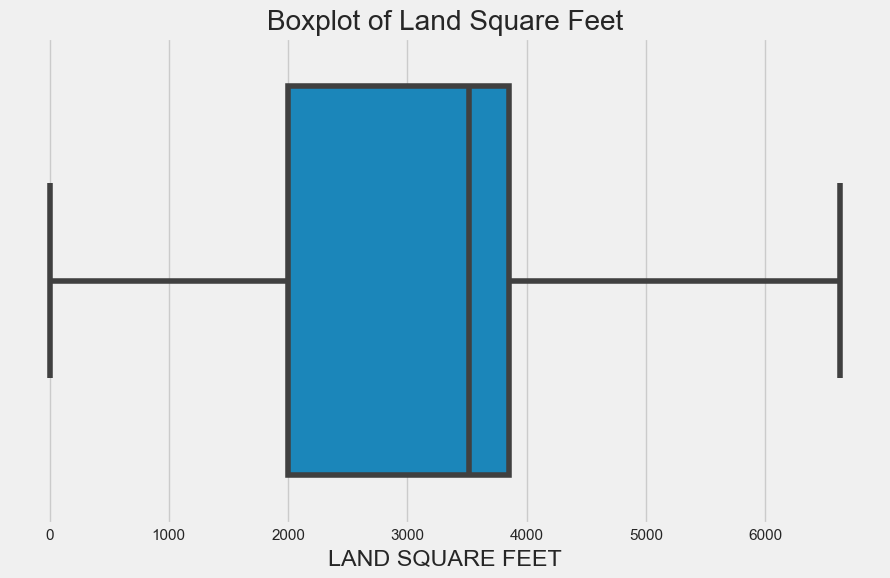

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='LAND SQUARE FEET', data=data,showfliers=False)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Land Square Feet')

In [23]:
data = data[data['GROSS SQUARE FEET'] < 10000]
data = data[data['LAND SQUARE FEET'] < 10000]

In [24]:
data.shape

(53856, 22)

## Measure of Central Tendency

- ### Mean

In [25]:
# Mean of Sale Price, Land and Gross Square Feet
SalePrice_mean = np.mean(data['SALE PRICE'], axis=0)
LandSqrFeet_mean = np.mean(data["LAND SQUARE FEET"], axis=0)
GrossSqrFeet_mean = np.mean(data["GROSS SQUARE FEET"], axis=0)

print("Mean of Sale Price:", SalePrice_mean)
print("Mean of Land Square Feet:", LandSqrFeet_mean)
print("Mean of Gross Square Feet:", GrossSqrFeet_mean)

Mean of Sale Price: 854328.5140745692
Mean of Land Square Feet: 2845.4934194644343
Mean of Gross Square Feet: 2438.183230449348


In [26]:
# Mean of Total Units and Sale Price per month from 2016 -  2017
df_mean1 = data.groupby(["SALE YEAR", "SALE MONTH"])[['TOTAL UNITS', 'SALE PRICE']].mean()
df_mean1

TOTAL UNITS     SALE PRICE
SALE YEAR SALE MONTH                            
2016      December       1.194002  821042.929679
          November       1.153023  801429.321860
          October        1.663443  814061.036509
          September      1.159385  813253.666256
2017      April          1.140652  857554.699776
          August         1.017963  908109.114911
          February       1.170272  846440.849095
          January        1.114043  873543.082377
          July           1.079343  902202.785797
          June           1.091143  907824.341602
          March          1.154265  836604.530287
          May            1.122505  866466.604329

In [27]:
# Median of Total units, land and gross square feet, and sale price in each Borough
df_mean2 = data.groupby(["BOROUGH"])[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].mean()
df_mean2.sort_values(["SALE PRICE"], ascending=False, inplace=True)
df_mean2

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,
Manhattan,0.523631,3809.810511,3896.159239,1.380573e+06
Brooklyn,1.488089,1313.955136,1324.359608,9.738906e+05
Queens,1.231887,3416.163152,2666.373846,6.021809e+05
Staten Island,1.247703,3571.588848,2017.306941,4.836620e+05
Bronx,1.571687,2027.103964,1647.200680,4.518542e+05


- ### Median

In [28]:
# Median of Sale Price, Land and Gross Square Feet
SalePrice_median = statistics.median(data['SALE PRICE'])
LandSqrFeet_median = statistics.median(data["LAND SQUARE FEET"])
GrossSqrFeet_median = statistics.median(data["GROSS SQUARE FEET"])

print("Median of Sale Price:", SalePrice_median)
print("Median of Land Square Feet:", LandSqrFeet_median)
print("Median of Gross Square Feet:", GrossSqrFeet_median)

Median of Sale Price: 625000.0
Median of Land Square Feet: 3400.0
Median of Gross Square Feet: 2384.0


In [29]:
# Median of Total Units and Sale Price per month from 2016 -  2017
df_median1 = data.groupby(["SALE YEAR", "SALE MONTH"])[['TOTAL UNITS', 'SALE PRICE']].median()
df_median1

TOTAL UNITS  SALE PRICE
SALE YEAR SALE MONTH                         
2016      December            1.0    600000.0
          November            1.0    590000.0
          October             1.0    600000.0
          September           1.0    599000.0
2017      April               1.0    608500.0
          August              1.0    699000.0
          February            1.0    610000.0
          January             1.0    628000.0
          July                1.0    670000.0
          June                1.0    660315.0
          March               1.0    600000.0
          May                 1.0    642500.0

In [30]:
# Median of Total units, land and gross square feet, and sale price in each borough
df_median2 = data.groupby(["BOROUGH"])[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].median()
df_median2.sort_values(["SALE PRICE"], ascending=False, inplace=True)
df_median2


,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,
Manhattan,0.0,3854.481179,3894.415813,998500.0
Brooklyn,1.0,1600.000000,1166.000000,775000.0
Queens,1.0,3854.481179,2440.000000,505000.0
Staten Island,1.0,3750.000000,1678.000000,465426.0
Bronx,1.0,2185.000000,1665.000000,410000.0


- ### Mode

In [31]:
# Mode of all features
pd.DataFrame(data).mode()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR,SALE MONTH
0,Queens,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,D4,131-05 40TH ROAD,,10314,...,1,3854.481179,3894.415813,1920,2,D4,450000.0,2017-06-29,2017,June


## Measure of Spead

- ### Range

In [32]:
# Range of Sale Price, Land and Gross Square Feet
SalePrice_range = np.ptp(data['SALE PRICE'])
LandSqrFeet_range = np.ptp(data["LAND SQUARE FEET"])
GrossSqrFeet_range = np.ptp(data["GROSS SQUARE FEET"])

print("Range of Sale Price:", SalePrice_range)
print("Range of Land Square Feet:", LandSqrFeet_range)
print("Range of Gross Square Feet:", GrossSqrFeet_range)

Range of Sale Price: 4896506.0
Range of Land Square Feet: 9996.0
Range of Gross Square Feet: 9926.0


- ### Variance 

In [33]:
# Variance of Sale Price, Land and Gross Square Feet
SalePrice_var = statistics.variance(data['SALE PRICE'])
LandSqrFeet_var = statistics.variance(data["LAND SQUARE FEET"])
GrossSqrFeet_var = statistics.variance(data["GROSS SQUARE FEET"])

print("variance of Sale Price:", SalePrice_var)
print("variance of Land Square Feet:", LandSqrFeet_var)
print("variance of Gross Square Feet:", GrossSqrFeet_var)

variance of Sale Price: 574371544367.3818
variance of Land Square Feet: 2485824.8069760115
variance of Gross Square Feet: 2316348.2062864993


In [34]:
# variance of Total Units and Sale Price per month from 2016 -  2017
df_var1 = data.groupby(["SALE YEAR", "SALE MONTH"])[['TOTAL UNITS', 'SALE PRICE']].var()
df_var1

TOTAL UNITS    SALE PRICE
SALE YEAR SALE MONTH                           
2016      December       1.675223  5.394092e+11
          November       1.480184  5.150288e+11
          October     1236.123703  5.280526e+11
          September      1.523422  5.430001e+11
2017      April          1.190620  6.309503e+11
          August         1.559362  5.898861e+11
          February       1.646724  5.788102e+11
          January        1.251852  6.176578e+11
          July           1.329890  5.863850e+11
          June           1.397683  6.131077e+11
          March          1.366554  5.815596e+11
          May            1.443796  5.549829e+11

In [35]:
# Variance of Total units, land and gross square feet, and sale price in each borough
df_var2 = data.groupby(["BOROUGH"])[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].var()
df_var2.sort_values(["SALE PRICE"], ascending=False, inplace=True)
df_var2

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,
Manhattan,0.948727,1.008394e+05,6.704443e+04,1.057040e+12
Brooklyn,1.959280,1.928605e+06,2.340782e+06,5.521584e+11
Queens,295.434639,1.195218e+06,1.513293e+06,1.811692e+11
Bronx,2.172873,2.782941e+06,2.173588e+06,1.083198e+11
Staten Island,0.424572,2.795339e+06,1.073571e+06,4.568666e+10


- ### Standard Deviation

In [36]:
# Standard Deviation of Sale Price, Land and Gross Square Feet
SalePrice_std = np.std(data['SALE PRICE'])
LandSqrFeet_std = np.std(data["LAND SQUARE FEET"])
GrossSqrFeet_std = np.std(data["GROSS SQUARE FEET"])

print("Standard Deviation of Sale Price:", SalePrice_std)
print("Standard Deviation of Land Square Feet:", LandSqrFeet_std)
print("Standard Deviation of Gross Square Feet:", GrossSqrFeet_std)

Standard Deviation of Sale Price: 757866.0036031663
Standard Deviation of Land Square Feet: 1576.6352305141106
Standard Deviation of Gross Square Feet: 1521.9412591345078


In [37]:
# Standard deviation of Total Units and Sale Price per month from 2016 -  2017
df_std1 = data.groupby(["SALE YEAR", "SALE MONTH"])[['TOTAL UNITS', 'SALE PRICE']].std()
df_std1

TOTAL UNITS     SALE PRICE
SALE YEAR SALE MONTH                            
2016      December       1.294304  734444.817965
          November       1.216628  717655.058768
          October       35.158551  726672.276028
          September      1.234270  736885.407794
2017      April          1.091156  794323.772349
          August         1.248744  768040.401512
          February       1.283247  760795.754326
          January        1.118862  785912.084681
          July           1.153209  765757.793470
          June           1.182236  783011.922963
          March          1.168997  762600.521484
          May            1.201580  744971.740187

In [38]:
# Standard deviation of Total units, land and gross square feet, and sale price in each borough
df_std2 = data.groupby(["BOROUGH"])[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].std()
df_std2.sort_values(["SALE PRICE"], ascending=False, inplace=True)
df_std2

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,
Manhattan,0.974026,317.552226,258.929393,1.028125e+06
Brooklyn,1.399743,1388.742374,1529.961288,7.430736e+05
Queens,17.188212,1093.260266,1230.159755,4.256398e+05
Bronx,1.474067,1668.215037,1474.309403,3.291198e+05
Staten Island,0.651592,1671.926611,1036.132843,2.137444e+05


## Probability Distribution

/var/folders/xy/xy312wfd7rl3ln2c6qntrhdr0000gn/T/ipykernel_33129/794849085.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SALE PRICE'])


<Axes: xlabel='SALE PRICE', ylabel='Density'>

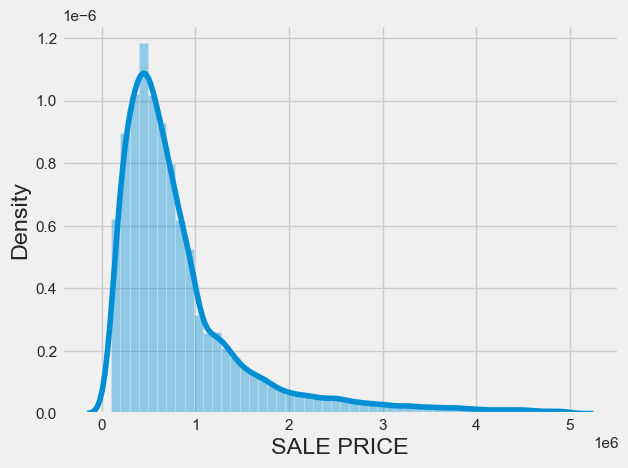

In [39]:
# Probability Distribution of Sale Price
sns.distplot(data['SALE PRICE'])

In [40]:
#skewness of SalePrice
data['SALE PRICE'].skew()

2.373711682712686

Sale price is highly positively skewed.

0.19249711883538315


/var/folders/xy/xy312wfd7rl3ln2c6qntrhdr0000gn/T/ipykernel_33129/3215388609.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sp_normal,


<Axes: xlabel='SALE PRICE', ylabel='Density'>

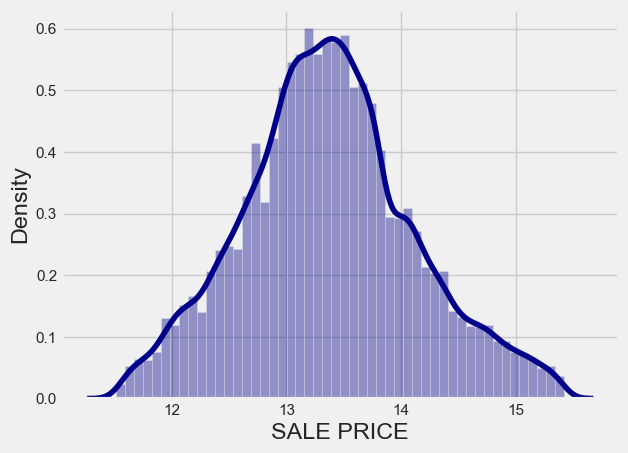

In [41]:
# Transform Sale Price with log transformation to manage the skew
sp_normal =np.log(data['SALE PRICE'])
print(sp_normal.skew())
sns.distplot(sp_normal,
             kde=True,
             color='darkblue')

## Confidence Interval

- ### CI of Mean

In [42]:
# CI for sale price of Borough
CI_Borough = data.groupby(["BOROUGH"]).agg({"SALE PRICE": [np.mean, np.std, np.size]})
CI_Borough


SALE PRICE                     
                       mean           std   size
BOROUGH                                         
Bronx          4.518542e+05  3.291198e+05   4415
Brooklyn       9.738906e+05  7.430736e+05  14399
Manhattan      1.380573e+06  1.028125e+06  12251
Queens         6.021809e+05  4.256398e+05  17349
Staten Island  4.836620e+05  2.137444e+05   5442

In [43]:
# CI for sale price in Queens
mean_queens = 6.021809e+05
std_queens = 4.256398e+05
n = 17349
z = 1.96 

In [44]:
se = std_queens/ np.sqrt(n)

lcb = mean_queens - z * se
ucb = mean_queens + z * se

print("Confidence Interval: ", lcb, 'and' , ucb)

Confidence Interval:  595847.1476519895 and 608514.6523480106


In [45]:
# CI for sale price of One Family Dwellings in Queens
CI_bcc = data.groupby(["BUILDING CLASS CATEGORY", "BOROUGH"]).agg({"SALE PRICE": [np.mean, np.std, np.size]})
CI_bcc.head()

SALE PRICE  \
                                                                   mean   
BUILDING CLASS CATEGORY                     BOROUGH                       
01 ONE FAMILY DWELLINGS                     Bronx          4.252086e+05   
                                            Brooklyn       8.769684e+05   
                                            Manhattan      2.521223e+06   
                                            Queens         6.159284e+05   
                                            Staten Island  4.773104e+05   

                                                                         \
                                                                    std   
BUILDING CLASS CATEGORY                     BOROUGH                       
01 ONE FAMILY DWELLINGS                     Bronx          1.946719e+05   
                                            Brooklyn       6.894051e+05   
                                            Manhattan      1.300247e+06   
                                            Queens         3.039587e+05   
                                            Staten Island  1.804808e+05   

                                                                   
                                                             size  
BUILDING CLASS CATEGORY                     BOROUGH                
01 ONE FAMILY DWELLINGS                     Bronx           982.0  
                                            Brooklyn       2228.0  
                                            Manhattan        27.0  
                                            Queens         5666.0  
                                            Staten Island  3318.0

In [46]:
mean_01 = 6.159284e+05
std_01 = 3.039587e+05
n = 5666
z = 1.96 

In [47]:
se = std_01/ np.sqrt(n)

lcb = mean_01 - z * se
ucb = mean_01 + z * se

print("Confidence Interval: ", lcb, 'and' , ucb)

Confidence Interval:  608013.7381482649 and 623843.0618517351


## Hypothesis Testing

- ### Difference of Means

Apakah terdapat perbedaan rata-rata harga jual pada properti yang dibangun di tahun 1900an dan tahun 2000an?

Significance level (alpha) : 5% (0.05)

Hipotesis :

H0: μ1 = μ2 (tidak terdapat perbedaan rata-rata harga jual pada properti yang dibangun di tahun 1900an dan tahun 2000an)

H1: μ1 ≠ μ2 (terdapat perbedaan rata-rata harga jual pada properti yang dibangun di tahun 1900an dan tahun 2000an)

In [48]:
yb_sp = data[['YEAR BUILT', 'SALE PRICE']]
yb_sp.head(20)

,YEAR BUILT,SALE PRICE
3,1913,3936272.0
6,1920,3192840.0
13,1920,499000.0
15,1920,529500.0
16,1920,423000.0
17,1925,501000.0
18,1920,450000.0
19,1920,510000.0
21,1902,350000.0
24,1928,350000.0


In [49]:
yb_90s= yb_sp[(yb_sp["YEAR BUILT"] >= 1900) & (yb_sp["YEAR BUILT"] < 2000)]
yb_90s.head()

,YEAR BUILT,SALE PRICE
3,1913,3936272.0
6,1920,3192840.0
13,1920,499000.0
15,1920,529500.0
16,1920,423000.0


In [50]:
yb_00s = yb_sp[yb_sp["YEAR BUILT"] >= 2000]
yb_00s.head()

,YEAR BUILT,SALE PRICE
95,2014,701341.0
100,2014,753421.0
104,2014,771980.0
112,2014,1247356.0
116,2005,2150000.0


In [51]:
n90s = len(yb_90s)
n00s = len(yb_00s)

# Mean
mean_90s = yb_90s["SALE PRICE"].mean()
mean_00s = yb_00s["SALE PRICE"].mean()

#Standard Deviation
std_90s = yb_90s["SALE PRICE"].std()
std_00s = yb_00s["SALE PRICE"].std()

print(n90s, mean_90s, std_90s,'\n',n00s, mean_00s, std_00s)

41302 769141.8979952545 677883.9745991053 
 7705 1146820.944192083 912094.1786953621


In [52]:
sm.stats.ztest(yb_90s['SALE PRICE'], yb_00s['SALE PRICE'], alternative='two-sided')

(-42.283577555846904, 0.0)

Berdasarkan data di atas, diketahui p-value adalah 0.0 yang mana nilainya lebih kecil dari alpha (0.0 < 0.05). Maka dari itu, H0 ditolak dan H1 diterima, sehingga dapat disimpulkan bahwa ada cukup bukti untuk mengatakan bahwa terdapat perbedaan rata-rata harga jual pada properti yang dibangun di tahun 1900an dan tahun 2000an

## Conclusions

- Data yang digunakan untuk perhitungan statistik di tugas ini didapati dari hasil data cleaning dan inspection yang mana berjumlah 53856. Data ini pada awalnya berjumlah 84548 
- Dari kelima Borough, yang memiliki harga jual dengan rata-rata dan nilai tengah yang tertinggi adalah Manhattan
- Sale Price berdistribusi gamma dan kurvanya memiliki kemencengan positif, sehingga, untuk mengubah kurva tsb menjadi simetris, maka digunakan log transformation
- Confidence Interval untuk rata-rata harga jual properti di daerah Queens berada di interval 595847.1476519895 dan 608514.6523480106 USD
- Confidence Interval untuk rata-rata harga jual kategori kelas bangunan One Family Dwellings di Queens berada di interval 608013.7381482649 dan 623843.0618517351 USD
- Berdasarkan hypothesis testing untuk menentukan apakah ada perbedaan rata-rata harga jual pada properti yang dibangun di tahun 1900an dan tahun 2000an, dapat diketahui p-value (0.0) kurang dari alpha (0.05). Dengan begitu, dapat dikatakan bahwa terdapat perbedaan rata-rata harga jual pada properti yang dibangun di tahun 1900an dan tahun 2000an